# Data Preprocessing

## Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Data

In [140]:
animes_df = pd.read_csv('data/animes.csv')
reviews_df = pd.read_csv('data/reviews.csv')

print("Animes DF: {}\nReviews DF: {}".format(animes_df.shape, reviews_df.shape))

Animes DF: (19311, 12)
Reviews DF: (192112, 7)


## animes.csv cleaning
- get rid of columns I won't use
- check for any duplicate or null values. if so, get rid of them
- separate the genres column
- extract aired date

In [168]:
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [169]:
# check size of data
animes_df.shape

(19311, 12)

In [170]:
# check column types
animes_df.dtypes

uid             int64
title          object
synopsis       object
genre          object
aired          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
img_url        object
link           object
dtype: object

Step 1: Only keep columns that will be used

In [171]:
# grab the columns that will be used
animes_df = animes_df[['uid', 'title', 'genre', 'aired', 'ranked', 'score']]

Step 2: Check for duplicate rows or null values. If they exist, get rid of them.

In [172]:
# check for duplicate rows
animes_df.duplicated().sum()

3085

In [173]:
# drop duplicate rows
animes_df.drop_duplicates(inplace=True)

In [174]:
# check for duplicate rows
animes_df.duplicated().sum()

0

In [175]:
animes_df.shape

(16226, 6)

In [176]:
# check how many values in each row is null
animes_df.isnull().sum()

uid          0
title        0
genre        0
aired        0
ranked    1663
score      341
dtype: int64

In [177]:
# get rid of any row with null value in ranked column
animes_df = animes_df[animes_df['ranked'].notnull()]

In [178]:
# check how many values in each row is null
animes_df.isnull().sum()

uid       0
title     0
genre     0
aired     0
ranked    0
score     0
dtype: int64

In [179]:
animes_df.shape

(14563, 6)

Step 3: Separating the genre column. The goal here is to create a column for every available genre and put a 1 in a cell if a show belongs to that genre, 0 otherwise.

In [13]:
# grab an entry of 'genre' to see format of string
animes_df.iloc[0]['genre']

"['Comedy', 'Sports', 'Drama', 'School', 'Shounen']"

In [14]:
genres = []

# for every anime, split the genre column value to get each genre type
for genre_set in animes_df.genre:
    values = genre_set.strip("[]").split(",")
    values = [w.strip()[1:-1] for w in values]
    
    # add genres to list
    genres.extend(values)

# drop all duplicate values
genres = set(genres)
print("The number of genres is {}.".format(len(genres)))
print(genres)

The number of genres is 41.
{'', 'Mystery', 'Cars', 'Shoujo Ai', 'Sci-Fi', 'Thriller', 'Slice of Life', 'Drama', 'Action', 'Magic', 'Game', 'Harem', 'Historical', 'Seinen', 'Police', 'Vampire', 'Super Power', 'Shoujo', 'Kids', 'Parody', 'Sports', 'Military', 'Psychological', 'School', 'Fantasy', 'Shounen Ai', 'Demons', 'Ecchi', 'Shounen', 'Space', 'Horror', 'Josei', 'Martial Arts', 'Supernatural', 'Samurai', 'Romance', 'Music', 'Adventure', 'Dementia', 'Comedy', 'Mecha'}


Notice the first element is empty. This happend when calling split(","). We can quickly delete that and alphabetize the list of genres for readability.

In [15]:
# delete first empty element
genres = list(genres)
genres.pop(0)
# alphabetize the list of genres
genres = sorted(genres)
print("The number of genres is {}.".format(len(genres)))
print(genres)

The number of genres is 40.
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire']


Now that I have a list of all possible genre types. I wanted to make a column for each genre. The value of the column will be a 1 if an anime is listed under this genre or a 0 if it is not.

In [16]:
def split_genres(anime):
    '''
    Will split the genre column of any anime row and return a 1 if the anime is listed in that genre.
    
    INPUT:
    anime - a string of the genres column for a specific anime
    
    OUTPUT:
    1 - if anime is listed in genre
    0 - if anime is not listed in genre
    '''
    try:
        # if genre is listed in the 'genre' column of an anime
        if anime.find(genre) > -1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

# create column for each genre and fill in columns
for genre in genres:
    animes_df[genre] = animes_df['genre'].apply(split_genres)

Now there is an easier way to identify the genres that an anime is listed as. This will be used for filtering and content based recommendations.

In [17]:
animes_df.head()

,uid,title,genre,aired,ranked,score,Action,Adventure,Cars,Comedy,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,8.82,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",24.0,8.83,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",23.0,8.83,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",1.0,9.23,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",22.0,8.83,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Step 4: I followed the same process as above and extracted the decades that these shows aired and created a column for each decade. 1 will indicated that the show is from that decade, otherwise 0. I only want the year when it first aired and not the end year.

In [18]:
# get format of 'aired' column
animes_df.iloc[0]['aired']

'Oct 4, 2015 to Mar 27, 2016'

In [19]:
# check to see if they are all like the format above
animes_df['aired'].value_counts()

Not available                   133
2005                             55
2004                             45
2008                             42
2003                             42
                               ... 
Aug 8, 2013 to Aug 22, 2013       1
Sep 21, 1985                      1
Aug 22, 2001                      1
Aug 26, 2011                      1
Sep 27, 2011 to Dec 25, 2011      1
Name: aired, Length: 10038, dtype: int64

The format of the 'aired' column changes from show to show so it'll be difficult to tell what the earliest air date is. I refined the function below after many errors to handle all of the formats. I grouped together everything that is Pre 1970's for my own sanity.

In [20]:
def split_anime_decade(val, decade):
    '''
    INPUT:
    val the 'aired' column value for a row
    decade - one of the values from the (list) decade list 
             below this cell
    
    OUTPUT:
    1 - if show in decade
    0 - if show not in decade
    '''
    # extract year from 'aired' column
    try:
        year = val.split(',')[1]
        year = year.strip()[:4]
    except:
        year = val.strip()[:4]
    
    # decide wether show belongs to decade
    try:
        if decade == 'Pre 1970':
            if int(year) < 1970:
                return 1
            return 0
        if int(year) >= int(decade) and int(year) < int(decade) + 10:
            return 1
        else:
            return 0
    except:
        return 0

Note: I purposfully grouped everything before the 1970's into one 'decade'. Each decade of anime brings with it a similar animation art style and type of storytelling. With the format of the 'aired' column being different throughout the dataframe, I couldn't tell what was the earliest date. So I decided to separate the decades as follows.

In [21]:
# valid decades
decades = ['Pre 1970s', '1970s', '1980s', '1990s', '2000s', '2010s']

# for every decade, find what shows belong to it
for decade in decades:
    column = []
    for row in animes_df['aired']:
        column.append(split_anime_decade(row, decade[:-1]))
    animes_df[decade] = column
    
animes_df.head()

,uid,title,genre,aired,ranked,score,Action,Adventure,Cars,Comedy,...,Super Power,Supernatural,Thriller,Vampire,Pre 1970s,1970s,1980s,1990s,2000s,2010s
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,8.82,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",24.0,8.83,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",23.0,8.83,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",1.0,9.23,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",22.0,8.83,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


Now that there is an easier way to identify what genre and decade a show belongs to, I no longer need the genre or aired column. They can be dropped.

In [22]:
animes_df = animes_df.drop(['genre', 'aired'], axis=1)
animes_df.head()

,uid,title,ranked,score,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Super Power,Supernatural,Thriller,Vampire,Pre 1970s,1970s,1980s,1990s,2000s,2010s
0,28891,Haikyuu!! Second Season,25.0,8.82,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,23273,Shigatsu wa Kimi no Uso,24.0,8.83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34599,Made in Abyss,23.0,8.83,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5114,Fullmetal Alchemist: Brotherhood,1.0,9.23,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,31758,Kizumonogatari III: Reiketsu-hen,22.0,8.83,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


## Data Visualizations

In [23]:
animes_df = animes_df.sort_values(by='ranked', ascending=True)
animes_df.head()

,uid,title,ranked,score,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Super Power,Supernatural,Thriller,Vampire,Pre 1970s,1970s,1980s,1990s,2000s,2010s
3,5114,Fullmetal Alchemist: Brotherhood,1.0,9.23,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
773,9253,Steins;Gate,2.0,9.11,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
772,11061,Hunter x Hunter (2011),3.0,9.11,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
771,32281,Kimi no Na wa.,4.0,9.09,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
770,38524,Shingeki no Kyojin Season 3 Part 2,5.0,9.07,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [24]:
# grab top 100 rated shows
top_100 = animes_df.head(100)

# only get genre columns
top_100 = top_100.iloc[:,4:-6]

# get rid of any columns that have no values
top_100 = top_100.loc[:, top_100.sum(axis=0) > 0]
top_100.shape

(100, 34)

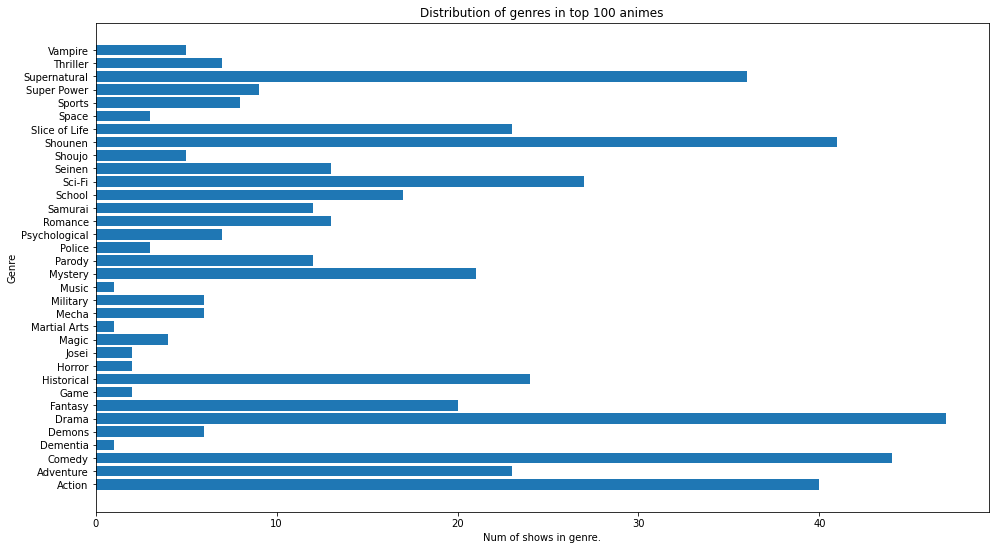

In [25]:
# get total num of shows that are in
# each genre (for top 100 shows)
top_sums = []
for genre in top_100.columns:
    top_sums.append(top_100[genre].sum())
    
fig, ax = plt.subplots(figsize =(16, 9))

plt.xlabel('Num of shows in genre.')
top_list = list(top_100.columns)

plt.ylabel('Genre')
ax.barh(top_list, top_sums)

plt.title('Distribution of genres in top 100 animes')

plt.show()

In [26]:
# get total num of shows in
# each genre (for all shows)
genre_sums = []
genre_df = animes_df.iloc[:,4:-6]
for genre in genre_df.columns:
    genre_sums.append(genre_df[genre].sum())

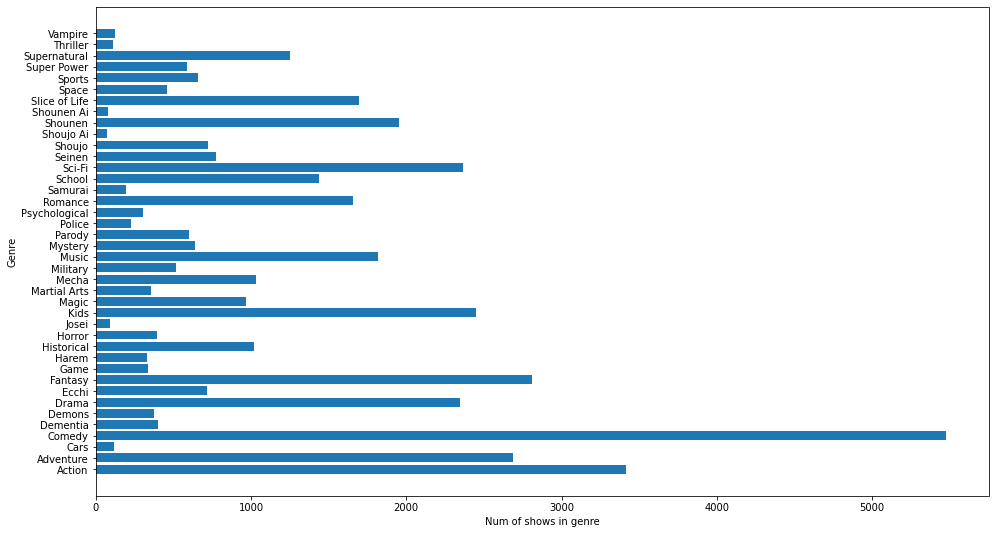

In [27]:
fig, ax = plt.subplots(figsize =(16, 9))

plt.xlabel('Num of shows in genre')
genre_list = list(genre_df.columns)

plt.ylabel('Genre')
ax.barh(genre_list, genre_sums)
plt.title('Distribution of genres')
plt.show()

In [28]:
# get total num of shows in each decade
decades_sum = []
decades_df = animes_df.iloc[:,-6:]
for decade in decades_df.columns:
    decades_sum.append(decades_df[decade].sum())

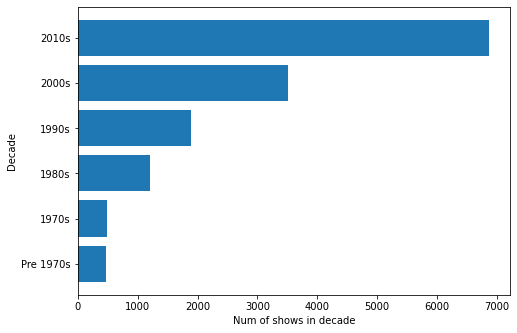

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.xlabel('Num of shows in decade')
decades_list = list(decades_df.columns)

plt.ylabel('Decade')
ax.barh(decades_list, decades_sum)
plt.title('Distribution of shows in each decade')
plt.show()

## reviews.csv cleaning
Steps to clean data:
- Check for duplicate rows. If they exist, get rid of them.
- Keep the three columns needed (profile, anime_uid, score). Get rid of the rest.
- Check for null values in the ‘score’ column. If they exist, get rid of them.

In [30]:
reviews_df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [63]:
# check shape of data
reviews_df.shape

(192112, 7)

Step 1: Check for duplicate row. If they exist, get rid of them.

In [141]:
# check for duplicate rows
reviews_df.duplicated().sum()

61593

In [142]:
# drop duplicate rows
reviews_df.drop_duplicates(inplace=True)

In [180]:
# check for duplicate rows
reviews_df.duplicated().sum()

0

Step 2: Keep the three columns needed (profile, anime_uid, score). Get rid of the rest.

In [144]:
# grab the three needed columns
reviews_df = reviews_df[['profile', 'anime_uid', 'score']]

Step 3: Check for null values in the ‘score’ column. If they exist, get rid of them.

In [68]:
# check for any missing values
reviews_df.isnull().sum()

profile      0
anime_uid    0
score        0
dtype: int64

In [69]:
# check how many different animes were rated
len(reviews_df['anime_uid'].unique())

8113

In [70]:
# check how many reviews there were
reviews_df.shape

(130519, 3)

# Implementation
The implementation will be broken up into three parts. One for each kind of recommendation.

## Section 1 - Knowledge Based Recommendations
This is the simplest form of recommending content to users. Users will provide a genre or date that will act as a filter for our data. There are only 3 'filters' the users can sort by (rank, genre, date).
Steps for section:
- create get_top_ranked() function
- create get_top_ranked_genre() function
- create get_top_ranked_decade() function

In [40]:
def get_top_ranked(n, df=animes_df):
    '''
    INPUT:
    df - animes df from cells above
    n - number of recs to return
    
    OUTPUT:
    recs -  the id, title, and rank of each recommendation
    '''
    recs = []
    
    # grab n recommendation
    for i in range(n):
        show = df.iloc[i]
        
        # only grab show info
        recs.append((show.uid, show.title, show.ranked))
                    
    return recs

In [41]:
get_top_ranked(25)

[(5114, 'Fullmetal Alchemist: Brotherhood', 1.0),
 (9253, 'Steins;Gate', 2.0),
 (11061, 'Hunter x Hunter (2011)', 3.0),
 (32281, 'Kimi no Na wa.', 4.0),
 (38524, 'Shingeki no Kyojin Season 3 Part 2', 5.0),
 (28977, 'Gintama°', 6.0),
 (9969, "Gintama'", 7.0),
 (820, 'Ginga Eiyuu Densetsu', 8.0),
 (35180, '3-gatsu no Lion 2nd Season', 9.0),
 (28851, 'Koe no Katachi', 10.0),
 (15417, "Gintama': Enchousen", 11.0),
 (4181, 'Clannad: After Story', 12.0),
 (918, 'Gintama', 13.0),
 (15335, 'Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare', 14.0),
 (34096, 'Gintama.', 15.0),
 (32935, 'Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou', 16.0),
 (2904, 'Code Geass: Hangyaku no Lelouch R2', 17.0),
 (35247, 'Owarimonogatari 2nd Season', 18.0),
 (38000, 'Kimetsu no Yaiba', 19.0),
 (199, 'Sen to Chihiro no Kamikakushi', 20.0),
 (37510, 'Mob Psycho 100 II', 21.0),
 (31758, 'Kizumonogatari III: Reiketsu-hen', 22.0),
 (34599, 'Made in Abyss', 23.0),
 (23273, 'Shigatsu wa Kimi no Uso', 24.

Next is filtering the shows by a specific genre and sorting by highest ranked.

In [42]:
def get_top_ranked_genre(genre, n, df=animes_df):
    '''
    INPUT:
    genre - a string containing the genre that will be filtered by
    n - the number of recommendations to be returned
    df - the animes df from above
    
    OUTPUT:
    recs - a list of recommendations with title and url link
    '''
    
    recs = []
    # grab all shows that are in a specific genre
    genre_df = df[df[genre] == 1]
    max_len = len(genre_df['title']) - 1

    for i in range(n):
        if i > max_len:
            break
        show = genre_df.iloc[i]
        
        # only grab show info
        recs.append((show.uid, show.title, show.ranked))
    
    return recs

In [43]:
genre = 'Romance'
# get top shows
recs = get_top_ranked_genre(genre, 100)
for show in recs:
    print(show)

(32281, 'Kimi no Na wa.', 4.0)
(4181, 'Clannad: After Story', 12.0)
(23273, 'Shigatsu wa Kimi no Uso', 24.0)
(17074, 'Monogatari Series: Second Season', 33.0)
(44, 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 35.0)
(38329, 'Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai', 37.0)
(431, 'Howl no Ugoku Shiro', 41.0)
(7311, 'Suzumiya Haruhi no Shoushitsu', 51.0)
(7785, 'Yojouhan Shinwa Taikei', 62.0)
(12365, 'Bakuman. 3rd Season', 63.0)
(4282, 'Kara no Kyoukai 5: Mujun Rasen', 72.0)
(38826, 'Tenki no Ko', 80.0)
(33674, 'No Game No Life: Zero', 93.0)
(10408, 'Hotarubi no Mori e', 104.0)
(33, 'Kenpuu Denki Berserk', 105.0)
(5205, 'Kara no Kyoukai 7: Satsujin Kousatsu (Kou)', 114.0)
(38889, 'Kono Oto Tomare! 2nd Season', 115.0)
(877, 'Nana', 117.0)
(5028, 'Major S5', 121.0)
(10030, 'Bakuman. 2nd Season', 133.0)
(5941, 'Cross Game', 134.0)
(37450, 'Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai', 135.0)
(37999, 'Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zun

The last ranked based filter is by the decade of the show.

In [44]:
def get_top_ranked_decade(decade, n, df=animes_df):
    '''
    INPUT:
    decade - a string containing the decade that will be filtered by
    n - the number of recommendations to be returned
    df - the animes df from above
    
    OUTPUT:
    recs - a list of recommendations with title and url link
    '''
    
    recs = []
    # grab all shows that are in a specific decade and sort by highest rank
    decade_df = df[df[decade] == 1]
    max_len = len(decade_df['title']) - 1

    for i in range(n):
        if i > max_len:
            break
        show = decade_df.iloc[i]

        # only grab show info
        recs.append((show.uid, show.title, show.ranked))
    
    return recs

In [45]:
decade = '1990s'
# get top 1990's animes
decades = get_top_ranked_decade(decade, 20)
for show in decades:
    print(show)

(1, 'Cowboy Bebop', 26.0)
(164, 'Mononoke Hime', 30.0)
(44, 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen', 35.0)
(245, 'Great Teacher Onizuka', 40.0)
(21, 'One Piece', 86.0)
(170, 'Slam Dunk', 87.0)
(32, 'Neon Genesis Evangelion: The End of Evangelion', 92.0)
(33, 'Kenpuu Denki Berserk', 105.0)
(392, 'Yuu☆Yuu☆Hakusho', 113.0)
(136, 'Hunter x Hunter', 119.0)
(437, 'Perfect Blue', 164.0)
(45, 'Rurouni Kenshin: Meiji Kenkaku Romantan', 178.0)
(43, 'Koukaku Kidoutai', 206.0)
(30, 'Neon Genesis Evangelion', 208.0)
(185, 'Initial D First Stage', 232.0)
(2559, 'Romeo no Aoi Sora', 254.0)
(6, 'Trigun', 256.0)
(585, 'Mimi wo Sumaseba', 265.0)
(9175, 'Tsuruhime Ja!', 270.0)
(235, 'Detective Conan (TV)', 295.0)


# Section 2 - Content Based Filtering
Content based filtering requires finding similar shows. To find similar shows, a subset of the animes_df has to created of just the genres and decades (the attributes of the shows). The subset should be a matrix filled with 1's and 0's. The dot product of that subet with the TRANSPOSE of that subset will result in a similarity matrix. With the similarity matrix, finding similar shows is as easy as pandas matrix filtering.

In [46]:
# get a subset of the animes df starting at the first genre column
attributes_matrix = animes_df.iloc[:, 4:]

# take the dot product of the show_attributes with the transpose of show_attributes
similarity_matrix = attributes_matrix.dot(np.transpose(attributes_matrix))

In [47]:
similarity_matrix.shape

(14563, 14563)

In [48]:
similarity_matrix.head()

,3,773,772,771,770,769,768,767,766,765,...,14335,14331,14330,14329,14328,14871,14870,14929,14869,14868
3,9,0,4,1,5,3,3,2,1,2,...,1,1,1,1,1,1,1,0,1,1
773,0,3,1,1,1,2,2,1,1,1,...,0,0,0,1,1,1,0,0,1,1
772,4,1,6,1,5,3,3,0,1,2,...,0,0,1,1,1,1,0,0,0,1
771,1,1,1,5,2,1,1,1,2,3,...,1,0,0,2,2,2,1,0,0,1
770,5,1,5,2,8,3,3,2,2,3,...,1,0,0,2,2,2,1,0,0,1


The numbers in each row correspond to how similar the two shows are. The higher the number = the more similar. 

The highest number in each row will be the show in comparison to itself. So there is a diagonal line going across the matrix which is the max number for each row. For example, the most similar show to show '1' (in the first row of the similarity matrix) IS show '1'. They share the exact same attributes. So comparing the other shows with that max number is how to evaluate the recommendations returned from the function below.

The lowest a number can be is 0 while the max in this matrix is 9. Shows will only be recommended if they have a similarity number greater than the max (the show with itself) - 2.

In [49]:
def find_similar_shows(anime_id, similarity_matrix):
    '''
    Finds similar shows based on what genres/decades they have in common
    
    INPUT:
    anime_id (int) - id of anime show that appears in the animes_df
    similarity_matrix (pandas dataframe) - the similarity matrix from above
    
    OUTPUT:
    similar_shows - pandas dataframe of similar shows sorted by highest rated
    '''
    recs = []
    
    # find index of show in similarity matrix
    show_idx = np.where(animes_df['uid'] == anime_id)[0][0]
    
    # find other shows that are similar to the one passed in as an arg
    similar_idxs = np.where(similarity_matrix.iloc[show_idx] > np.max(similarity_matrix.iloc[show_idx]-2))[0]

    
    # find their info in the animes dataframe
    similar_shows = animes_df.iloc[similar_idxs, ]
    
    # remove the show that was passed in as an arg
    # Note: the most similar show to the one that was passed IS the one that was passed
    similar_shows = similar_shows[similar_shows['uid'] != anime_id]
    
    # sort by highest rank
    similar_shows.sort_values(by=['ranked'], ascending=True)
    
    # store show title and rank for recs
    for index, row in similar_shows.iterrows():
        recs.append((row['title'], row['ranked']))
    
    
    
    return recs

In [50]:
# find similar shows to the highest ranked show
# anime_id 5114 belongs to the show ranked number 1
top_ranked_recs = find_similar_shows(5114, similarity_matrix)
for show in top_ranked_recs:
    print(show)

('Fullmetal Alchemist', 287.0)
('InuYasha Movie 3: Tenka Hadou no Ken', 791.0)
('InuYasha Movie 2: Kagami no Naka no Mugenjo', 1077.0)
('InuYasha Movie 1: Toki wo Koeru Omoi', 1275.0)
('InuYasha Movie 4: Guren no Houraijima', 1386.0)
('Fullmetal Alchemist: The Sacred Star of Milos', 2140.0)


In [51]:
show_idx = np.where(animes_df['uid'] == 5114)[0][0]
print('Similarity to itself: ', np.max(similarity_matrix.iloc[show_idx]))

Similarity to itself:  9


In [52]:
similarity_matrix.iloc[show_idx].value_counts()

1    4929
2    3538
0    2842
3    1903
4     910
5     350
6      75
7       9
8       5
9       2
Name: 3, dtype: int64

I'm not satisfied with these recommendations. The similarity matrix is saying that only these 6 shows are similar to the top ranking show. This function could be refined.

There needs to be ***at least*** 10 recommendations. If there are less than 10 when using (max - 2) to find similar shows, I will increase 'slack' by 1 so that the function grabs all the shows that are greater than (max - 3). This will continue until 10 shows are found.

In [53]:
def find_similar_shows(anime_id, similarity_matrix):
    '''
    Finds similar shows based on what genres/decades they have in common
    
    INPUT:
    anime_id (int) - id of anime show that appears in the animes_df
    similarity_matrix (pandas dataframe) - the similarity matrix from above
    
    OUTPUT:
    similar_shows - pandas dataframe of similar shows sorted by highest rated
    '''
    recs = []
    slack = 2
    
    # find index of show in similarity matrix
    show_idx = np.where(animes_df['uid'] == anime_id)[0][0]
    
    # find other shows that are similar to the one passed in as an arg
    similar_idxs = np.where(similarity_matrix.iloc[show_idx] > np.max(similarity_matrix.iloc[show_idx]-slack))[0]
    
    # if there are not the min num of recs
    while len(similar_idxs) < 10:
        slack += 1
        # give slack and grab more similar shows
        similar_idxs = np.where(similarity_matrix.iloc[show_idx] > np.max(similarity_matrix.iloc[show_idx]-slack))[0]
    
    # find their info in the animes dataframe
    similar_shows = animes_df.iloc[similar_idxs, ]
    
    # remove the show that was passed in as an arg
    # Note: the most similar show to the one that was passed IS the one that was passed
    similar_shows = similar_shows[similar_shows['uid'] != anime_id]
    
    # sort by highest rank
    similar_shows.sort_values(by=['ranked'], ascending=True)
    
    # store show title and rank for recs
    for index, row in similar_shows.iterrows():
        recs.append((row['title'], row['ranked']))
    
    
    
    return recs

In [54]:
# find similar shows to the highest ranked show
# anime_id 5114 belongs to the show ranked number 1
top_ranked_recs = find_similar_shows(5114, similarity_matrix)
for show in top_ranked_recs:
    print(show)

('InuYasha: Kanketsu-hen', 249.0)
('One Piece Film: Strong World', 283.0)
('Fullmetal Alchemist', 287.0)
('Tsubasa: Shunraiki', 350.0)
('Fullmetal Alchemist: Brotherhood Specials', 456.0)
('Fairy Tail', 665.0)
('InuYasha (TV)', 694.0)
('InuYasha Movie 3: Tenka Hadou no Ken', 791.0)
('InuYasha Movie 2: Kagami no Naka no Mugenjo', 1077.0)
('InuYasha Movie 1: Toki wo Koeru Omoi', 1275.0)
('InuYasha Movie 4: Guren no Houraijima', 1386.0)
('Fullmetal Alchemist: The Sacred Star of Milos', 2140.0)
('Fullmetal Alchemist: Reflections', 2363.0)
('Digimon Frontier', 2862.0)
('Zero no Tsukaima: Princesses no Rondo Picture Drama', 3699.0)


This looks better. I passed in the highest ranked show and the function above isn't returning the other highest ranking shows but shows that are most similar in attributes. This is what content based recommendations should look like.

Feel free to run this function to find some other recommendations! Just pass in an anime id from the animes dataframe!

In [ ]:
anime_id = # (int)
top_ranked_recs = find_similar_shows(anime_id, similarity_matrix)
for show in top_ranked_recs:
    print(show)

In [ ]:
anime_id = # (int)
top_ranked_recs = find_similar_shows(anime_id, similarity_matrix)
for show in top_ranked_recs:
    print(show)

# Collaborative Filtering
Collaborative filtering will require matrix factorization. To evaluate the models performance, the reviews data will need to be split into a training set and a test set. The steps for this section:
- Separate reviews data into a training and test set
- Create a FunkSVD algorithm and train the data
- Hyperparameter tuning
- Make predictions
- Prediction validation

In [145]:
reviews_df.head()

,profile,anime_uid,score
0,DesolatePsyche,34096,8
1,baekbeans,34599,10
2,skrn,28891,7
3,edgewalker00,2904,9
4,aManOfCulture99,4181,10


In [71]:
reviews_df.shape

(130519, 3)

Step 1: Create a training and test set for the FunkSVD algorithm in a 80/20 split.

In [146]:
def create_train_test(reviews, training_size, testing_size):
    '''    
    INPUT:
    reviews - (pandas df) dataframe to split into train and test
    order_by - (string) column name to sort by
    training_size - (int) number of rows in training set
    testing_size - (int) number of columns in the test set
    
    OUTPUT:
    training_df -  (pandas df) dataframe of the training set
    validation_df - (pandas df) dataframe of the test set
    '''
    
    # training data is 80% of the reviews dataset
    training_df = reviews_df.head(training_size)
    
    # testing data (validation data) is the remaining 20%
    validation_df = reviews_df.iloc[training_size : training_size + testing_size]
    
    return training_df, validation_df

In [147]:
# split train and validation data
train_df, val_df = create_train_test(reviews_df,  104000, 26519)

Step 2: Create a FunkSVD algorithm. This is a basic form of FunkSVD that performs matrix factorization.

In [15]:
def FunkSVD(user_item_matrix, latent_features, learning_rate, iters):
    '''
    This function performs matrix factorization using a basic form of FunkSVD with no regularization
    
    INPUT:
    user_item_matrix - (numpy array) a matrix with users as rows, animes as columns, and ratings as values
    latent_features - (int) the number of latent features used
    learning_rate - (float) the learning rate 
    iters - (int) the number of iterations
    
    OUTPUT:
    user_mat - (numpy array) a user by latent feature matrix
    anime_mat - (numpy array) a latent feature by anime matrix
    '''
    
    # Set up useful values to be used through the rest of the function
    n_users = user_item_matrix.shape[0]
    n_animes = user_item_matrix.shape[1]
    num_ratings = np.count_nonzero(~np.isnan(user_item_matrix))
    
    # initialize the user and anime matrices with random values
    user_mat = np.random.rand(n_users, latent_features)
    anime_mat = np.random.rand(latent_features, n_animes)
    
    # initialize sse at 0 for first iteration
    sse_accum = 0
    
    # keep track of iteration and MSE
    print("Optimizaiton Statistics")
    print("Iterations | Mean Squared Error ")
    
    # for each iteration
    for iteration in range(iters):

        # update our sse
        old_sse = sse_accum
        sse_accum = 0
        
        # For each user-anime pair
        for i in range(n_users):
            for j in range(n_animes):
                
                # if the rating exists
                if user_item_matrix[i, j] > 0:
                    
                    # compute the error as the actual minus the dot product of the user and anime latent features
                    diff = user_item_matrix[i, j] - np.dot(user_mat[i, :], anime_mat[:, j])
                    
                    # Keep track of the sum of squared errors for the matrix
                    sse_accum += diff**2
                    
                    # update the values in each matrix in the direction of the gradient
                    for k in range(latent_features):
                        user_mat[i, k] += learning_rate * (2*diff*anime_mat[k, j])
                        anime_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])

        # print results
        print("%d \t\t %f" % (iteration+1, sse_accum / num_ratings))
        
    return user_mat, anime_mat 

Now that the FunkSVD algorithm is done, a user-item matrix needs to be created. A user-item matrix is a matrix where the users are the rows, the anime shows are the columns and the ratings of the shows fill the cells.

In [148]:
# create user-item matrix
user_item_matrix = train_df.groupby(['profile', 'anime_uid'])['score'].max().unstack()
# convert to numpy array to feed into FunkSVD algorithm
train_data_np = np.array(user_item_matrix)

In [163]:
# Train the FunkSVD algorithm and return the U and V matrices
user_mat, anime_mat = FunkSVD(train_data_np, latent_features=15, learning_rate=0.005, iters=20)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 7.696302
2 		 4.273932
3 		 3.208036
4 		 2.595520
5 		 2.163113
6 		 1.835808
7 		 1.579264
8 		 1.371623
9 		 1.199322
10 		 1.054202
11 		 0.930934
12 		 0.825656
13 		 0.735386
14 		 0.657739
15 		 0.590764
16 		 0.532842
17 		 0.482612
18 		 0.438924
19 		 0.400810
20 		 0.367450


Step 3: Hyperparameter tuning

The cell above was the first step in tuning the model. The unforunate thing about FunkSVD is that finding the best parameters for it are done through trial and error. Each parameter is a small number solely to get a base for how well the model is performing. From here I can loop through different numbers of latent features to find which results in the lowest MSE. The same learning rate and num of iterations are used.

NOTE: The cell below will take a long time to run. There is no need to run it. The results of the cell are in the write up under the Model Evaluation and Validation section. The final parameters are the following.

user_mat, anime_mat = FunkSVD(train_data_np, latent_features=100, learning_rate=0.005, iters=30)

In [64]:
# num of latent features to test
latent_features = [25, 35, 45, 100]

# test each value from above
for feature in latent_features:
    print('Learning Rate: ', 0.005, '   |   ', 'Latent Features: ', feature)
    user_mat, anime_mat = FunkSVD(train_data_np, latent_features=feature, learning_rate=0.005, iters=20)

Learning Rate:  0.005    |    Latent Features:  25
Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 5.001055
2 		 3.474837
3 		 2.762005
4 		 2.247808
5 		 1.838886
6 		 1.512138
7 		 1.251048
8 		 1.040363
9 		 0.869461
10 		 0.730566
11 		 0.617456
12 		 0.525083
13 		 0.449365
14 		 0.387025
15 		 0.335441
16 		 0.292524
17 		 0.256617
18 		 0.226403
19 		 0.200837
20 		 0.179082
Learning Rate:  0.005    |    Latent Features:  35
Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 5.250201
2 		 3.510434
3 		 2.739188
4 		 2.166632
5 		 1.710929
6 		 1.353370
7 		 1.073636
8 		 0.854892
9 		 0.684120
10 		 0.550866
11 		 0.446759
12 		 0.365185
13 		 0.300978
14 		 0.250148
15 		 0.209633
16 		 0.177099
17 		 0.150771
18 		 0.129296
19 		 0.111643
20 		 0.097022
Learning Rate:  0.005    |    Latent Features:  45
Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 7.091316
2 		 3.807264
3 		 2.807594
4 		 2.115969
5 		 1.589458
6 		 1.197949
7 		 0.907

C:\Users\SaintGemini\AppData\Local\Temp\ipykernel_11720\746130157.py:50: RuntimeWarning: overflow encountered in double_scalars
  sse_accum += diff**2
C:\Users\SaintGemini\AppData\Local\Temp\ipykernel_11720\746130157.py:54: RuntimeWarning: overflow encountered in double_scalars
  user_mat[i, k] += learning_rate * (2*diff*movie_mat[k, j])


1 		 nan


C:\Users\SaintGemini\AppData\Local\Temp\ipykernel_11720\746130157.py:55: RuntimeWarning: overflow encountered in double_scalars
  movie_mat[k, j] += learning_rate * (2*diff*user_mat[i, k])


2 		 nan
3 		 nan
4 		 nan
5 		 nan
6 		 nan
7 		 nan
8 		 nan
9 		 nan
10 		 nan
11 		 nan
12 		 nan


KeyboardInterrupt: 

Clearly the 100 latent features performed the best and the learning rate seems to be a good foundation as well. But now that a good number has been chose, for two of the parameters, let's increase the iterations to see how well the algorithm performs when given more time to learn.

In [149]:
user_mat, anime_mat = FunkSVD(train_data_np, latent_features=100, learning_rate=0.005, iters=30)

Optimizaiton Statistics
Iterations | Mean Squared Error 
1 		 33.266839
2 		 5.944970
3 		 3.072303
4 		 1.746047
5 		 1.023346
6 		 0.616724
7 		 0.384339
8 		 0.248408
9 		 0.166548
10 		 0.115695
11 		 0.083108
12 		 0.061586
13 		 0.046954
14 		 0.036726
15 		 0.029387
16 		 0.023990
17 		 0.019929
18 		 0.016811
19 		 0.014370
20 		 0.012427
21 		 0.010856
22 		 0.009570
23 		 0.008504
24 		 0.007611
25 		 0.006856
26 		 0.006213
27 		 0.005660
28 		 0.005182
29 		 0.004765
30 		 0.004400


A MSE of 0.0044 isn't bad. It's the best value so far. If this algorithm kept running, it could further minimize the MSE. But this is sufficient for now.

Step 4: Make predictions

Now that the FunkSVD algorithm is trained. A way to predict ratings needs to be made. By taking the dot product of the user row in the user_matrix with the anime column in the anime_matrix, a rating could be predicted.

In [150]:
def predict_rating(user_matrix, anime_matrix, user_id, anime_id):
    '''
    INPUT:
    user_matrix - user by latent factor matrix
    anime_matrix - latent factor by anime matrix
    user_id - the user_id from the reviews df
    anime_id - the movie_id according the animes df
    
    OUTPUT:
    pred - the predicted rating for user_id-anime_id according to FunkSVD
    '''
    # Use the training data to create a series of users and animes that matches the ordering in training data
    user_ids_series = np.array(user_item_matrix.index)
    anime_ids_series = np.array(user_item_matrix.columns)
    
    # User row and anime column
    user_row = np.where(user_ids_series == user_id)[0][0]
    anime_col = np.where(anime_ids_series == anime_id)[0][0]
    
    # Take dot product of that row and column in U and V to make prediction
    pred = np.dot(user_matrix[user_row, :], anime_matrix[:, anime_col])
    
    return pred

In [151]:
# take a look at some profile and anime ids to test predictions
reviews_df.head()

,profile,anime_uid,score
0,DesolatePsyche,34096,8
1,baekbeans,34599,10
2,skrn,28891,7
3,edgewalker00,2904,9
4,aManOfCulture99,4181,10


In [152]:
# predict the value of the user 'DesolatePsyche' for anime 34096
pred_val = predict_rating(user_mat, anime_mat, 'DesolatePsyche', 34096)
pred_val

7.993763836305472

In [153]:
def print_prediction_summary(user_id, anime_id, prediction):
    '''
    INPUT:
    user_id - the user_id from the reviews df
    anime_id - the anime_id according the animes df
    prediction - the predicted rating for user_id-anime_id
    
    OUTPUT:
    None - prints a statement about the user, anime, and prediction made
    
    '''
    anime_name = animes_df[animes_df['uid'] == anime_id]['title'].values[0]
    print("For user {} we predict a {} rating for {}.".format(user_id, round(prediction, 2), anime_name))

In [154]:
print_prediction_summary('DesolatePsyche', 34096, pred_val)

For user DesolatePsyche we predict a 7.99 rating for Gintama..


That's pretty accurate. But that's not a surprise knowing that the training data has already seen that combination. This is where testing the predictions with the validation data comes in.

Step 5: Prediction validation

In [167]:
def validation_comparison(val_df, num_preds):
    '''
    INPUT:
    val_df - the validation dataset created above
    num_preds - (int) the number of rows (going in order) you would like to make predictions for
    
    OUTPUT:
    Nothing returned - print a statement about the prediciton made for each row of val_df from row 0 to num_preds
    '''
    # grab users, animes, and their ratings
    val_users = np.array(val_df['profile'])
    val_animes = np.array(val_df['anime_uid'])
    val_ratings = np.array(val_df['score'])  

    # for row in validation data, compare predicted rating vs actual rating
    for idx in range(num_preds):
        try:
            pred = predict_rating(user_mat, anime_mat, val_users[idx], val_animes[idx])
            title = animes_df[animes_df['uid'] == val_animes[idx]]['title'].values[0]
            print("The actual rating for user {} on anime {} is {}.\n While the predicted rating is {}.\n".format(val_users[idx], title, val_ratings[idx], round(pred)))
        # if coming across a new user or anime
        except:
            print('Cold Start Problem. New User/Anime that was not in training set.\n')
        
validation_comparison(val_df, 6)        

The actual rating for user Ledo-kun on anime Nisekoi: is 6.
 While the predicted rating is 9.

Cold Start Problem. New User/Anime that was not in training set.

The actual rating for user SeiIsFab on anime Nisekoi: is 8.
 While the predicted rating is 8.

The actual rating for user BanjoTheBear on anime Nisekoi: is 5.
 While the predicted rating is 1.

Cold Start Problem. New User/Anime that was not in training set.

The actual rating for user AbsarNaeem on anime Nisekoi: is 8.
 While the predicted rating is 7.



There is an issue with users or animes that haven't been seen by the training set. FunkSVD cannot give predicted ratings. For the Cold Start Problem, knowledge and content based recommendations are a way to give recommendations to new users or shows with no ratings. These recommendations can be found in Section 1 and 2.

The ratings returned by FunkSVD were not too bad. They are no where near perfect but this FunkSVD algorithm is a good base to build off of.